# Stærðfræði og reiknifræði – Tímadæmi 12 – Hermun

In [7]:
#BYRJA -- Keyrið til að frumstilla
import numpy as np, numpy.random as npr
import scipy.stats as stat, statsmodels.api as sm, scipy.linalg as la
import matplotlib.pyplot as plt, matplotlib as mpl
%matplotlib inline
plt.rc('axes', axisbelow=True);
# disp(x,y...) skrifar x,y... með 3 aukastöfum
def disp(*args): print(*(f'{a:.3f}' if isinstance(a,float) else a for a in args))
np.set_printoptions(precision=4, floatmode='fixed', suppress=True, linewidth=150)
def annaðformerki(x,y): return (x < 0) != (y < 0) 

Hermun (*simulation*) er mikilvæg aðferð í tölfræði (og ýmsum öðrum fræðum). Python hentar ágætlega til hermunar og í þessum tímadæmum er hún á dagskrá.

## A. Lægsta spilið
Hér er dæmi sem sýnir að hvernig nota má hermun til að finna væntigildi hendinga sem allflókið væri að reikna stærðfræðilega. Dregið er spil af handahófi úr venjulegum 52ja spila stokki og það skoðað og sett aftur í stokkinn. Þessi tilraun er framkvæmd aftur og aftur og haldin skrá um lægsta spilið í hverjum lit sem sést hefur. 

Látum röð litanna vera ♣︎ = 1, <font color='crimson'>♦︎</font> = 2, <font color='crimson'>♥︎</font> = 3 og ♠︎ = 4, spilin gilda tvistur = 2, þristur = 3, ..., gosi = 11, drottning = 12, kóngur = 13 og ás = 14.  Ef átta fyrstu spilin eru ♣︎2, <font color='crimson'>♦︎</font>D, <font color='crimson'>♥︎</font>K, <font color='crimson'>♦︎</font>Á, ♣︎6, <font color='crimson'>♥︎</font>9, <font color='crimson'>♥︎</font>7 og ♣︎9 er skráin $(2, 12, 7, \infty)$ (notum óendanlegt því enginn spaði hefur sést).

1. Búið til fall `dragaspil` sem skilar slembispili með því að kalla á það með:

        (litur,gildi) = dragaspil()
    
   (t.d. er skilað `(1,2)` fyrir laufatvist og `(4,14)` fyrir spaðaás). Fallið getur notað
   `npr.randint(low, high)` sem skilar heiltölu á bilinu `low` til `high – 1`. Prófið með því að kalla
   á fallið nokkrum sinnum.
   

In [131]:
def dragaspil():
    x = npr.randint(0,4)
    y = npr.randint(0,13)
    return x, y
    
suite = ['Laufa', 'Tígul', 'Hjarta', 'Spaða']
face = ['tvistur','þristur','fjarki','fimma','sexa','sjö','átta','nía','tía','gosi','drolla','kóngur','ás']
(litur, gildi) = dragaspil()
print(suite[litur], face[gildi])

Tígul ás


2. Gerið ráð fyrir að skráin yfir lægstu spilin sé geymd í 4-staka vigri `smátt` sem í upphafi er "óendanlegt" (`np.inf`) í öllum sætum. Búið til fall `dragaeitt` sem hermir eftir einni tilraun (þ.e. drætti eins spils) með því að kalla á `dragaspil` og uppfærir (*updates*) vigurinn `smátt`. Ef átta fyrstu spilin eru eins og að ofan og dregin er tígulátta, `(2,8)`, mundi `smátt` breytast í $(2, 8, 7, \infty)$. Prófið.

3. Búið til fall sem kalla má á með

       (fjöldi, minnst) = draga() 
       
   sem dregur spil þar til allir litir hafa sést og skilar fjölda skipta sem draga þarf og 
   lægsta spilinu sem sést hefur þegar það gerist (minnsta stakinu í smátt). 
   
   ***Leiðbeining:*** *Byrjið á að frumstilla (*initialize*)
   `smátt` með óendanlegu í öllum fjórum sætum (t.d. með `np.tile`; `np.tile(x, n)` skilar vigri þar sem
   `x` er endurtekið `n` sinnum). Svo kemur `while`-lykkja þar sem nota má `any` og `np.isinf` í skilyrðinu,
   og inni í lykkjunni er kallað á `dragaeitt`. Í lykkjunni þarf líka að hækka teljara, og á eftir henni þarf
   að finna minnsta stakið í `smátt`.*

4. Látið $X$ og $Y$ vera hendingar (*slembistærðir, random variables*), $X$ er fjöldi skipta sem draga þarf
   þar til allir litir hafa sést og $Y$ er
   lægsta spilið sem þá hefur sést. Notið hermun til að finna væntigildi $X$ og væntigildi $Y$
   
   ***Leiðbeining:*** *Inni í lykkju sem framkvæmd er mörgum sinnum er smátt núllstillt, svo er kallað á
   `draga`, og loks eru niðurstöðurnar aftast í tvo vigra
   `X` og `Y` (t.d. með `X = np.append(X,x)`). Á eftir lykkjunni er meðaltal vigranna reiknað með `np.mean`*

## B. Dreifingar á komutímum.
Þegar fólk kemur á tilviljanakenndum tíma í verslun (eða að afgreiðsluborði) passar oft vel að lýsa millitíma milli koma með vísisdreifingu (*exponential distribution*), en þéttifall hennar er 
$$f(x,\lambda) = \lambda e^{-\lambda x}\text{ fyrir }x \geq 0$$.

þar sem $\lambda$ er fjöldi sem kemur á hverri tímaeiningu. Stundum, m.a. í *NumPy*, er reyndar notaður stikinn $\beta = 1/\lambda$ sem er meðaltími milli koma.

1. Í Python fæst `n` talna vigur af slembitölum með vísisdreifingu og stika (þ.e. meðaltal) beta með `x = npr.exponential(beta, n)`. Hermið eftir komum 100 manna m.v. að það komi að jafnaði 5 manns á mínútu og teiknið einfalt súlurit af niðurstöðunni (t.d. með `plt.hist(x, rwidth=0.9)`. Prófið nokkrum sinnum. Prófið að fjölga mönnunum og breyta stikanum.

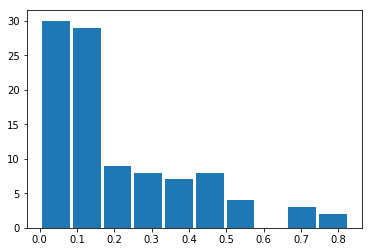

In [133]:
a = npr.exponential(1/5, 100)
plt.hist(a, rwidth=0.9);

2. Reiknið með hermun líkurnar á að það komi fleiri en 10 manns á næstu mínútu, með því að búa fyrst til fall sem finnur summu af 10 vísisdreifðum slembitölum, og svo annað sem kallar oft á fyrra fallið og athugar tíðni þess atburðar að summan sé minni en einn.

In [193]:
def sum10():
    x = npr. exponential(1/5, 10)
    return np.sum(x)

#print(sum10())
N = 10000
n = 0
for i in range(N):
    if sum10() < 1: n+=1

per = n/N * 100
print(f'{per:.2f}%')

3.20%


3. Afgreiðslutíma má oft lýsa með svonefndri Erlang-dreifingu sem er reyndar eins og summa af k vísisdreifðum hendingum. Erlang dreifing gæti líka passað til að lýsa komum strætós sem kemur ekki alveg reglulega og heldur ekki algjörlega af handahófi (þá væru komurnar vísisdreifðar). Svo er líka hægt að hliðra Erlang-dreifingunni t.d. ef alltaf tekur fastan tíma að byrja/ljúka afgreiðslu, og svo bætist við slembinn viðbótartími.
Í NumPy skilar kallið

       stat.erlang.rvs(k, alfa, beta, size = n)
       
   `n` slembitölum sem hafa hliðraða Erlang-dreifingu með stika `k`,
   fastan tíma `alfa` og meðaltal `alfa + k*beta`. 
   Gerum ráð fyrir að leið 1 komi á Erlang-dreifðum tímum með `k` = 3 
   og `alfa` = 4, að jafnaði á 10 mínútna fresti.<br>
   
   a) Reiknið beta<br>
   b) Teiknið súlurit af 1000 millikomutímum leiðar 1.<br>

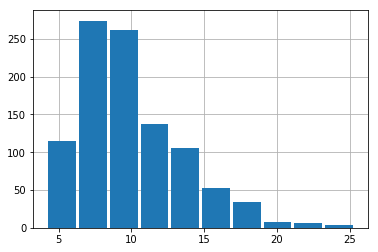

In [202]:
# 10 = alfa + k * beta
# 
# 10 - alfa = k * beta
# 
# (10 - alfa)/k = beta
# 
# beta = 2

#(k, alfa, beta) = (3, 4, 2)

mkt = stat.erlang.rvs(k, alfa, beta, 1000)

plt.hist(mkt, rwidth=0.9);
plt.grid()

4. Ákvarðið með hermun væntanlegan tíma sem maður þarf að bíða eftir strætó og líkurnar á að maður þurfi að bíða meira en 10 mínútur.

    ***Leiðbeining*** Byrjað er á að herma t.d. 1000 millikomutíma, $M_1,\ldots,
    M_{1000}$ (með `stat.erlang.rvs`) og reikna uppsafnaðar summur þeirra:
    
    $$T_k = \sum_{i=1}^k M_i$$
    
    (með `np.cumsum`) og summu þeirra allra $S$. Svo kemur maður út á stoppustöð á
    handahófstíma `mætir` á tímabilinu $[0,S]$, (í Python með `mætir = S*npr.random()`.
    Til að sjá hvenær næsti strætó kemur má t.d. nota:
    
        Teftir = T[T > mætir]
        bið = Teftir[0] - mætir
        
    (`Teftir` eru allir tímar eftir að maður mætir á stoppustöðina). Þetta má svo
    gera aftur og aftur í lykkju og reikna þannig marga biðtíma og taka að lokum
    meðaltalið af þeim.